# Modelling with Random Forest

## How Random Forest Benefits an Art Auction Dataset

**Random Forest Basics:**
- **Multiple Decision Trees:** Instead of relying on one decision tree, a random forest builds many trees using different parts of the data.
- **Improved Accuracy:** By combining the results from all these trees, it gives more reliable predictions, reducing the risk of mistakes from any single tree.
- **Handles Complexity:** Art auction data often has many factors (like artist, style, year, etc.) that affect prices. Random forest can capture these complex relationships well.

**Why Use Bootstrapping:**
- **Small Dataset Challenge:** When there isn't a lot of data, the model might not learn enough about the underlying patterns.
- **Creating More Data:** Bootstrapping helps by randomly sampling the existing data (with replacement) to create many "mini-datasets." This lets the model train on slightly different versions of your data.
- **Better Model Reliability:** With bootstrapping, the random forest gets to see more variety in the training process, which helps improve the prediction quality even when the dataset is small.


In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

# Load data from CSV (using latin1 encoding)
df = pd.read_csv("auction_data_cleaned draft 1.2.csv", encoding="latin1")

# Remove rows with missing (null) values 
df = df.dropna()

# Confirm how many rows are left after dropping of missing values
print(df.shape)

# Use bootstrapping to increase the sample size by 5x
df = df.sample(n=len(df) * 5, replace=True, random_state=42)

# Use '-1' position as the target variable is the last column and the rest are features
# Drop the target variable, which is the final price in X to prevent overfitting
target_column = df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert text-based categorical columns into dummy variables
X = pd.get_dummies(X)

# Split the data equally into training and testing sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

# Create and train a Random Forest model with 500 trees
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores to measure how well the model fits the data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE to quantify the prediction error
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training R2:", round(train_r2, 2))
print("Test R2:", round(test_r2, 2))
print("Training RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse))


(199, 29)
Training R2: 0.99
Test R2: 0.89
Training RMSE: 2296.44
Test RMSE: 6548


## Feature Importance

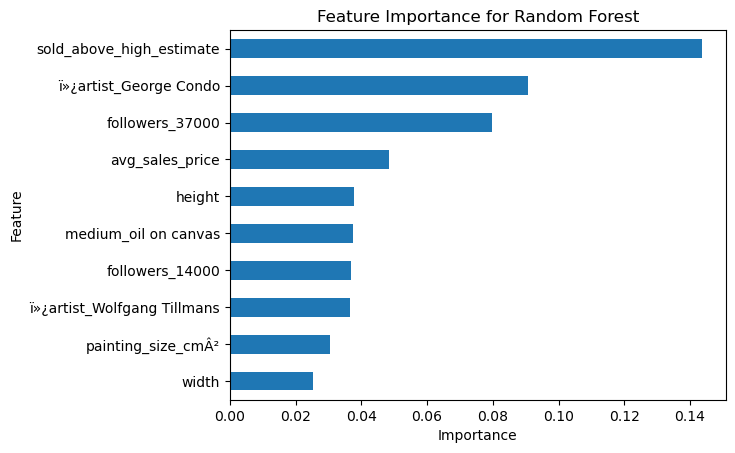

In [14]:
# Create a Pandas Series to map each feature to its importance as determined by the model
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select the top 10 features based on their importance and plot them as a horizontal bar chart.
# The invert_yaxis() call ensures that the most important feature appears at the top.
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

# Label the axis and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()